### NGO Inventory Analysis

This analysis can be used by NGO's to analyse the most frequently donated items and their expiry time frame. Based on time-series analysis, the NGO can explore the relationship between the recorded parameters like product_type vs expiry_date, etc

All the below analysis, will help organisation to better plan and manage the supplies.

In [ ]:
#Load all libraries
import pandas as pd
import seaborn as sns

In [ ]:
#Load all the dataset
df1 = pd.read_csv("/content/foodexp.csv") 
df2 = pd.read_csv("/content/foodfridge.csv") 
df3 = pd.read_csv("/content/foodshelf.csv") 
df4 = pd.read_csv("/content/foodsimple.csv") 

df5 = pd.read_csv("/content/orderHeaderDonations.csv") 
df6 = pd.read_csv("/content/orderHeaderRequests.csv") 
df7 = pd.read_csv("/content/orderItemsDonations.csv") 
df8 = pd.read_csv("/content/orderItemsRequests.csv") 

In [ ]:
#Expired Food Analysis

In [ ]:
df1.shape

(679, 5)

In [ ]:
df1.head()

,TYPE,ITEM,PERIOD,DETAILS,STORAGE
0,BEVERAGES,"Juice in cartons, fruit drinks, punch",3 weeks,unopened,REFRIGERATED
1,BEVERAGES,"Juice in cartons, fruit drinks, punch",7-10 days,opened,REFRIGERATED
2,BEVERAGES,"Juice in cartons, fruit drinks, punch",8-12 months,NaN,FROZEN
3,DIARY,Butter,1-3 months,NaN,REFRIGERATED
4,DIARY,Butter,6-9 months,NaN,FROZEN


In [ ]:
df1['TYPE'].unique()

array(['BEVERAGES', 'DIARY', 'DOUGH', 'PASTA', 'PESTO', 'SOY', 'FISH',
       'SHELLFISH', 'SMOKEDFISH', 'FRESH_MEAT', 'PROCESSED_MEAT',
       'FRESH_POULTRY', 'PROCESSED_POULTRY', 'FRUIT', 'VEGETABLES',
       'FROZEN_ITEM', 'DELI_ITEM', 'SHELF_ITEM', 'BAKING', 'CONDIMENTS',
       'COOKIES', 'CRACKERS', 'BAKERY'], dtype=object)

In [ ]:

pd.value_counts(df1.TYPE)

SHELF_ITEM           171
VEGETABLES            80
BAKERY                69
DIARY                 56
FROZEN_ITEM           42
FRUIT                 38
DELI_ITEM             32
BAKING                29
PROCESSED_MEAT        26
CONDIMENTS            23
SHELLFISH             19
SOY                   18
PROCESSED_POULTRY     16
FISH                  14
FRESH_MEAT             8
FRESH_POULTRY          8
DOUGH                  7
SMOKEDFISH             7
CRACKERS               4
COOKIES                3
PASTA                  3
PESTO                  3
BEVERAGES              3
Name: TYPE, dtype: int64

In [ ]:
df1['ITEM'].unique()

array(['Juice in cartons, fruit drinks, punch', 'Butter', 'Buttermilk',
       'Cheese, hard (such as cheddar,  swiss, block parmesan)',
       'Parmesan, shredded', 'Shredded cheddar, mozzarella, etc.',
       'Cheese, processed slices',
       'Cheese, soft (such as Brie, Bel Paese)',
       'Cottage cheese, ricotta', 'Cream cheese',
       'Cream, whipping, ultrapasteurized', 'Whipped, sweetened',
       'Aerosol can, real whipped cream', 'Aerosol can, nondairy topping',
       'Cream, half-and-half', 'Dips, sour cream based',
       'Egg substitutes, liquid', 'Eggnog, commercial', 'Eggs, in shell',
       'Eggs, raw whites, yolks*', 'Eggs, hard cooked',
       'Kefir (fermented milk)', 'Margarine', 'Milk, plain or flavored',
       'Pudding', 'Sour cream', 'Yogurt',
       'Tube cans of biscuits, rolls, pizza dough, etc.',
       'Ready-to-bake pie crust', 'Cookie dough', 'Pasta, fresh',
       'Pesto or Sala', 'Soy or rice beverage, refrigerated', 'Tofu',
       'Miso', 'Lean fish

In [ ]:

pd.value_counts(df1.ITEM)

Pudding                                                             6
Coffee, instant, jars and tins                                      4
Cheesecake                                                          4
Coffee, non-vacuum bag ground, in cans                              4
Coffee, whole beans                                                 4
                                                                   ..
Ice cream                                                           1
Doughnuts, glazed or cake, dairy cream filled                       1
Sugar, granulated                                                   1
Soda such as carbonated cola drinks, mixers: regular sodas, cans    1
Toaster pastries, non-fruit fillings                                1
Name: ITEM, Length: 300, dtype: int64

In [ ]:
df1['PERIOD'].unique()

array(['3 weeks', '7-10 days', '8-12 months', '1-3 months', '6-9 months',
       '1-2 weeks', '3 months', '6 months', '3-4 weeks', '1 month',
       '3-4 months', '1-2 months', nan, '1 week', '2 weeks', '1 day',
       '3-4 days', '4 months', '10 days', '3 days', '3-5 days',
       '3-5 weeks', '2-4 days', '12 months', '1 week after date',
       '1-2 days', 'Package date', '2 days', '7-21 days', 'Do not freeze',
       '7-14 days', 'Use-by date', '2 months', 'Use by date',
       'package date', '5 months', '6-8 months', '2-3 months',
       '1-4 weeks', '9 months', '3-6 months', '5 days', '9-12 months',
       '5-8 days', '14 days', '4-12 months', '5-7 days', '2-3 weeks',
       '4-6 months', '8 months', 'Until ripe', '2-3 days', '2-3days',
       '10-12 months', '4-5 days', '3-7 days', '10-14 days',
       '8-10 months', '4-7 days', 'Date on Carton', '2-4 months',
       '6-12 months', '12-18 months', '4 days', 'refer to jar',
       '2-5 years', '1-3 weeks', '2 years', '18 months',

In [ ]:
pd.value_counts(df1.PERIOD)

1-2 days                   45
12 months                  45
3-4 days                   40
6 months                   38
1 week                     37
                           ..
Use entire amount           1
18-24 months                1
Use by pkg. date            1
3 months or use-by date     1
2-3days                     1
Name: PERIOD, Length: 88, dtype: int64

In [ ]:
pd.value_counts(df1.DETAILS)

opened                          135
unopened                        118
Do not freeze                    34
fresh                             2
Do not defrost. Cook frozen.      2
Use all                           1
Whole                             1
skin will blacken                 1
Cooked                            1
Cool, dark place                  1
Shredded                          1
After baking                      1
Balls                             1
Mix entire packet                 1
Use entire can                    1
Cooked and mashed                 1
Sliced, lemon juice & sugar       1
popped                            1
G                                 1
Whole peeled                      1
vacuum pkg                        1
Name: DETAILS, dtype: int64

In [ ]:
pd.value_counts(df1.STORAGE)

REFRIGERATED    236
SHELF           228
FROZEN          195
THAWED           20
Name: STORAGE, dtype: int64

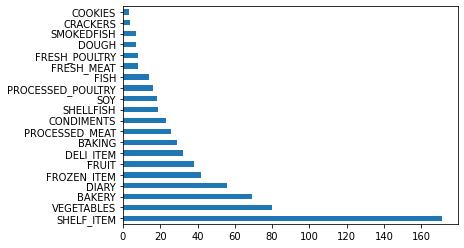

In [ ]:
df1['TYPE'].value_counts()[:20].plot(kind='barh')

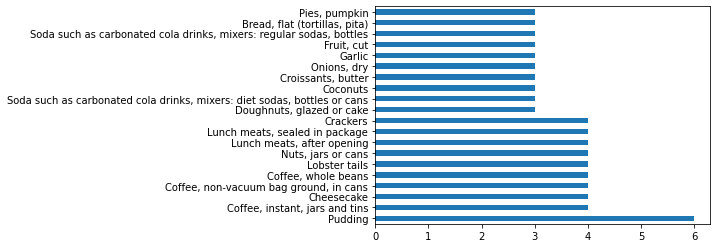

In [ ]:
df1['ITEM'].value_counts()[:20].plot(kind='barh')

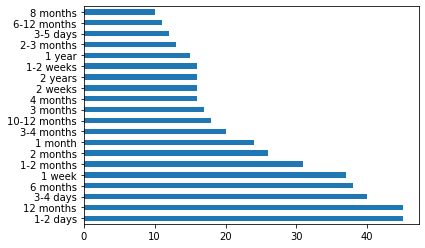

In [ ]:
df1['PERIOD'].value_counts()[:20].plot(kind='barh')

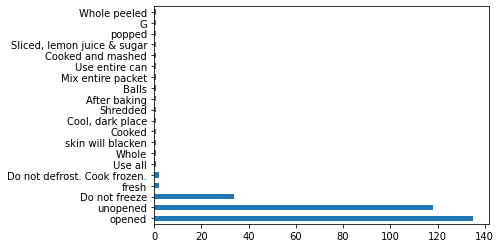

In [ ]:
df1['DETAILS'].value_counts()[:20].plot(kind='barh')

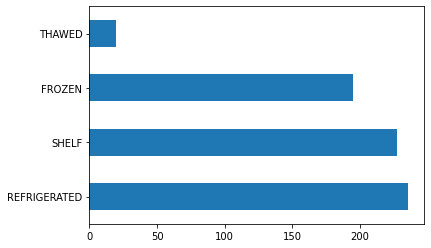

In [ ]:
df1['STORAGE'].value_counts()[:20].plot(kind='barh')

In [ ]:
periods = ["1 week", "6 months","12 months","1-2 days","3-4 days"]
gapminder_periods= df1[df1.PERIOD.isin(periods)]
gapminder_periods.shape


(205, 5)

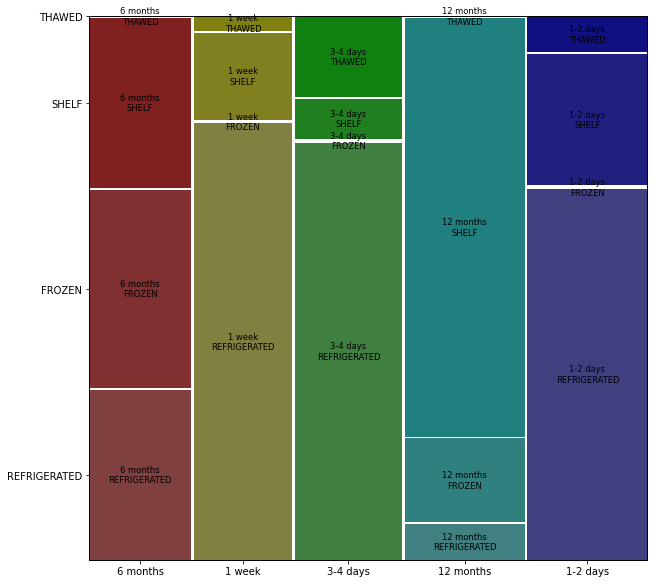

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(gapminder_periods, ['PERIOD', 'STORAGE'])
plt.rcParams["figure.figsize"]=(0.1,0.1)

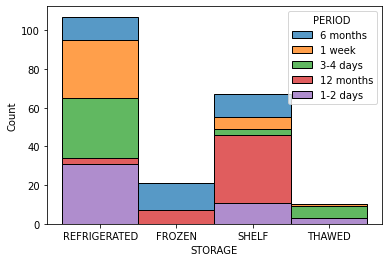

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="STORAGE", hue="PERIOD", data=gapminder_periods, stat="count", multiple="stack")


In [ ]:
details = ["opened", "unopened","Do not freeze","fresh"]
gapminder_details= gapminder_periods[gapminder_periods.DETAILS.isin(details)]
gapminder_details.shape

(71, 5)

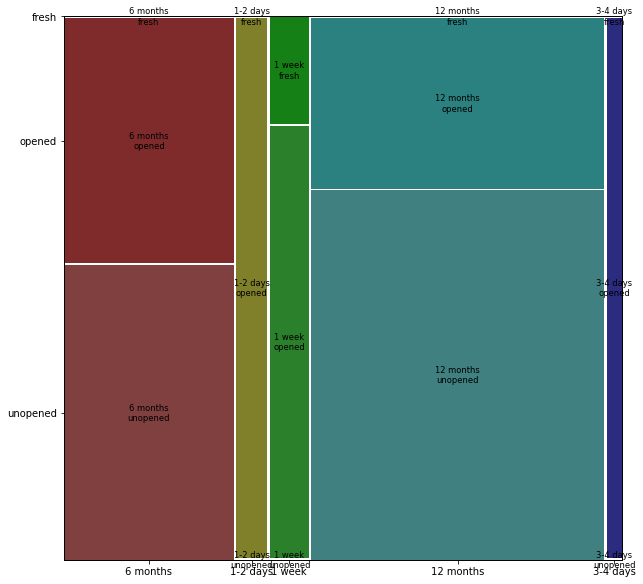

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(gapminder_details, ['PERIOD', 'DETAILS'])
plt.rcParams["figure.figsize"]=(1,1)

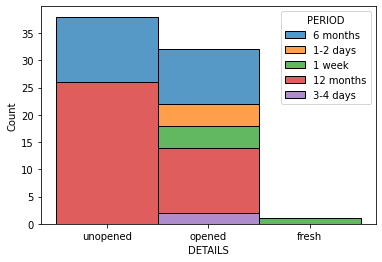

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="DETAILS", hue="PERIOD", data=gapminder_details, stat="count", multiple="stack")


In [ ]:
df2.shape

(451, 5)

In [ ]:
df2.head()

,TYPE,ITEM,PERIOD,DETAILS,STORAGE
0,BEVERAGES,"Juice in cartons, fruit drinks, punch",3 weeks,unopened,REFRIGERATED
1,BEVERAGES,"Juice in cartons, fruit drinks, punch",7-10 days,opened,REFRIGERATED
2,BEVERAGES,"Juice in cartons, fruit drinks, punch",8-12 months,NaN,FROZEN
3,DIARY,Butter,1-3 months,NaN,REFRIGERATED
4,DIARY,Butter,6-9 months,NaN,FROZEN


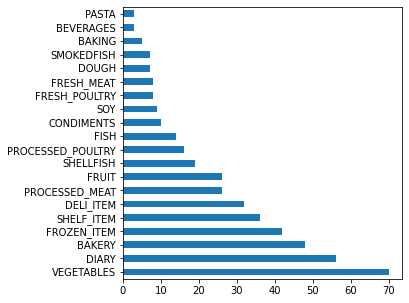

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
df2['TYPE'].value_counts()[:20].plot(kind='barh')


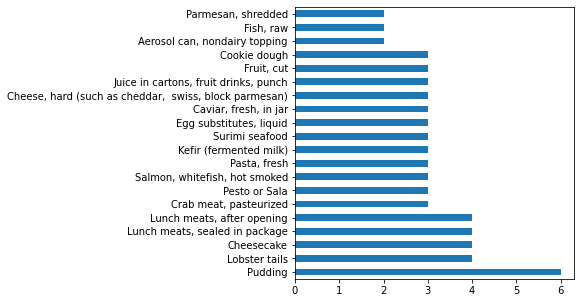

In [ ]:
df2['ITEM'].value_counts()[:20].plot(kind='barh')

In [ ]:
#DONATIONS

In [ ]:
df7.shape

(9220, 8)

In [ ]:
df7.head()

,OrderId,OrderItemId,ProductType,ProductItem,ProductPeriod,ProductDetails,ProductStorage,Quantity
0,20051,1,DIARY,"Cheese, processed slices",1-2 months,NaN,REFRIGERATED,105
1,20051,2,DIARY,"Eggs, in shell",3-5 weeks,NaN,REFRIGERATED,120
2,20051,3,DIARY,Margarine,12 months,NaN,FROZEN,140
3,20051,4,DIARY,"Milk, plain or flavored",1 week,NaN,REFRIGERATED,135
4,20051,5,SOY,Tofu,1 week,NaN,REFRIGERATED,145


In [ ]:
pd.value_counts(df7.ProductType)

DIARY                1894
VEGETABLES           1218
PROCESSED_MEAT        874
FRUIT                 864
SHELF_ITEM            778
BAKERY                653
FROZEN_ITEM           568
DELI_ITEM             438
SOY                   391
SHELLFISH             276
PROCESSED_POULTRY     244
FISH                  203
CONDIMENTS            134
FRESH_MEAT            118
DOUGH                 113
SMOKEDFISH            103
FRESH_POULTRY          99
BAKING                 81
PESTO                  59
PASTA                  39
BEVERAGES              31
CRACKERS               27
COOKIES                15
Name: ProductType, dtype: int64

In [ ]:
pd.value_counts(df7.ProductItem)

Milk, plain or flavored                    312
Tofu                                       305
Apples                                     302
Ham, canned ("keep refrigerated" label)    295
Margarine                                  294
                                          ... 
Chocolate syrup                              9
Jerky, homemade                              9
Salad Dressings, commercial, bottled         8
Horseradish, in jar                          8
Soy or rice beverage, shelf stable           6
Name: ProductItem, Length: 240, dtype: int64

In [ ]:
pd.value_counts(df7.ProductPeriod)

1 week               1310
1-2 days              698
1-2 months            647
Until ripe            534
3-4 days              489
                     ... 
5 days                 12
1 week after date      11
Do not freeze           9
7-21 days               8
5-8 days                8
Name: ProductPeriod, Length: 67, dtype: int64

In [ ]:
pd.value_counts(df7.ProductStorage)

REFRIGERATED    4869
FROZEN          3010
SHELF           1068
THAWED           273
Name: ProductStorage, dtype: int64

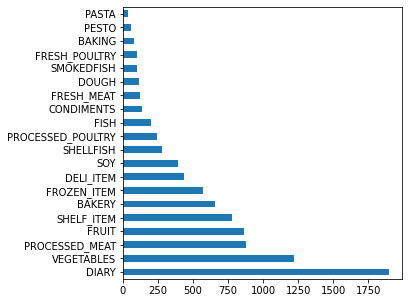

In [ ]:
df7['ProductType'].value_counts()[:20].plot(kind='barh')

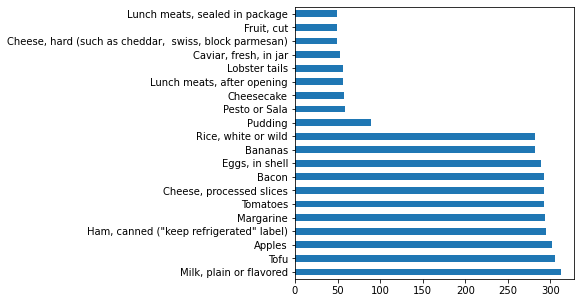

In [ ]:
df7['ProductItem'].value_counts()[:20].plot(kind='barh')

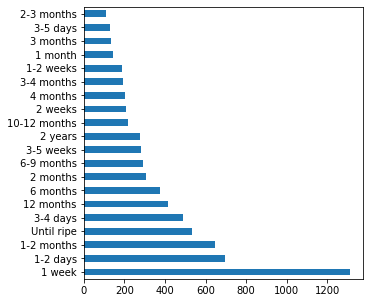

In [ ]:
df7['ProductPeriod'].value_counts()[:20].plot(kind='barh')

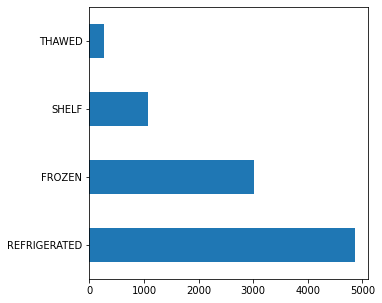

In [ ]:
df7['ProductStorage'].value_counts()[:20].plot(kind='barh')

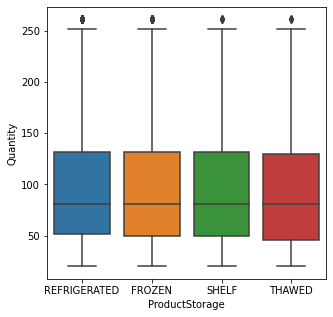

In [ ]:
sns.boxplot(x="ProductStorage", y="Quantity", data=df7);

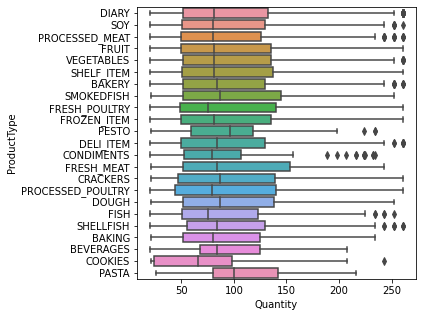

In [ ]:
sns.boxplot(orient='h',x="Quantity", y="ProductType", data=df7,);

In [ ]:

periods = ["1 week", "1-2 days","1-2 months","Until Ripe"]
gapminder_periods2= df7[df7.ProductPeriod.isin(periods)]
gapminder_periods2.shape


(2655, 8)

(<Figure size 720x720 with 3 Axes>,
 OrderedDict([(('1-2 months', 'REFRIGERATED'),
               (0.0, 0.0, 0.24127836512464806, 0.4499058870338348)),
              (('1-2 months', 'SHELF'),
               (0.0, 0.4532062170668381, 0.24127836512464806, 0.0)),
              (('1-2 months', 'FROZEN'),
               (0.0,
                0.45650654709984134,
                0.24127836512464806,
                0.5401931228671553)),
              (('1-2 months', 'THAWED'), (0.0, 1.0, 0.24127836512464806, 0.0)),
              (('1 week', 'REFRIGERATED'),
               (0.24622886017415302,
                0.0,
                0.48852342861404785,
                0.9810294006499887)),
              (('1 week', 'SHELF'),
               (0.24622886017415302,
                0.9843297306829919,
                0.48852342861404785,
                0.0)),
              (('1 week', 'FROZEN'),
               (0.24622886017415302,
                0.9876300607159954,
                0.488523428614

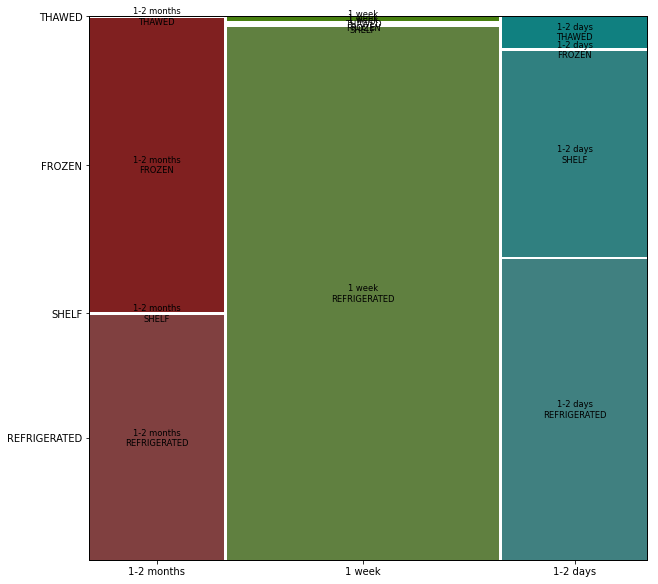

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(10,10)
mosaic(gapminder_periods2, ['ProductPeriod', 'ProductStorage'])


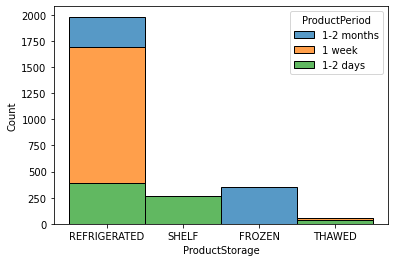

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="ProductStorage", hue="ProductPeriod", data=gapminder_periods2, stat="count", 
             multiple="stack")


In [ ]:
producttypes = ["DIARY", "VEGETABLES","PROCESSED_MEAT"]
gapminder_periods2= gapminder_periods2[gapminder_periods2.ProductType.isin(producttypes)]
gapminder_periods2.shape

(1223, 8)

(<Figure size 720x720 with 3 Axes>,
 OrderedDict([(('1-2 months', 'DIARY'),
               (0.0, 0.0, 0.36673332091999056, 0.668830314459892)),
              (('1-2 months', 'PROCESSED_MEAT'),
               (0.0,
                0.6721415727380377,
                0.36673332091999056,
                0.2784965571685452)),
              (('1-2 months', 'VEGETABLES'),
               (0.0,
                0.9539493881847286,
                0.36673332091999056,
                0.046050611815271265)),
              (('1 week', 'DIARY'),
               (0.3716838159694955,
                0.0,
                0.5756013050201176,
                0.4750328331517031)),
              (('1 week', 'PROCESSED_MEAT'),
               (0.3716838159694955,
                0.4783440914298488,
                0.5756013050201176,
                0.4862100762846843)),
              (('1 week', 'VEGETABLES'),
               (0.3716838159694955,
                0.9678654259926788,
                0.5756013

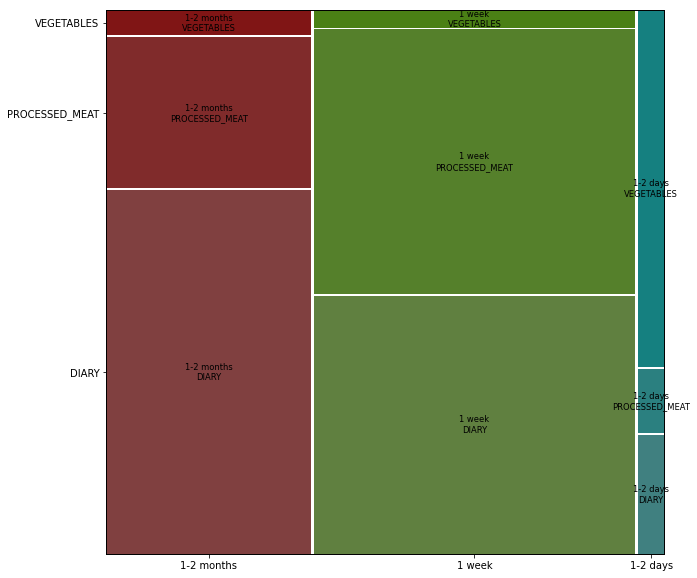

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(10,10)
mosaic(gapminder_periods2, ['ProductPeriod', 'ProductType'])

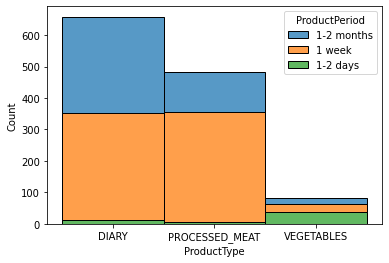

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="ProductType", hue="ProductPeriod", data=gapminder_periods2, stat="count", 
             multiple="stack")

In [ ]:
df5.shape

(267, 7)

In [ ]:
df5.head()

,OrderId,PartnerId,OrderTotal,OrderDate,PartnerName,PartnerGeoLat,PartnerGeoLon
0,20051,190050,2000,2021-01-11,FoodieLand,-27.49079,153.06799
1,20052,190050,2000,2021-01-12,FoodieLand,-27.49079,153.06799
2,20053,190050,2000,2021-01-13,FoodieLand,-27.49079,153.06799
3,20054,190050,2000,2021-01-14,FoodieLand,-27.49079,153.06799
4,20055,190050,2000,2021-01-15,FoodieLand,-27.49079,153.06799


In [ ]:
pd.value_counts(df5.PartnerName)

Grocertown    89
LoMarket      89
FoodieLand    89
Name: PartnerName, dtype: int64

Text(0.5, 0, 'Partner Name')

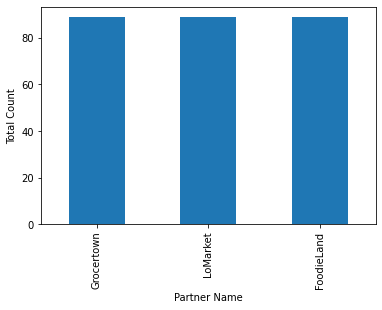

In [ ]:
df5['PartnerName'].value_counts()[:20].plot(kind="bar")
plt.ylabel("Total Count")
plt.xlabel("Partner Name")

In [ ]:
df5['OrderDate'] = pd.to_datetime(df5['OrderDate'])

In [ ]:
type(df5['OrderDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

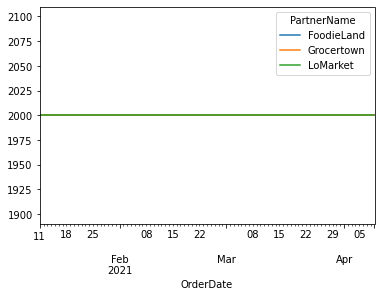

In [ ]:
df5.pivot(index="OrderDate", columns="PartnerName", values="OrderTotal").plot()
plt.show()